# 사기탐지
* 사기탐지 데이터의 특징: 클래스 불균형이 매우 심함
* 모델을 훈련시킬 수 있는 데이터가 매우 적다
* 모델 성능을 올리기 위해서 데이터 증폭, 축소를 통한 클래스 불균형 문제를 해결하고 
* 모델을 만드는 것이 필요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


<Axes: xlabel='Amount', ylabel='Count'>

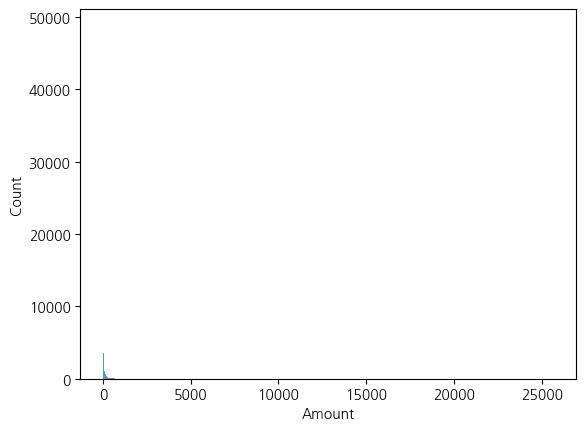

In [7]:
sns.histplot(data['Amount'])

In [8]:
77.165000 + (1.5 * (77.165000 - 5.6))

184.51250000000005

In [9]:
data2 = data[data['Amount'] > 184.51250000000005]

In [10]:
data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,...,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000
mean,93445.400577,-0.749136,-1.826656,-0.481082,0.150851,-0.924023,0.469958,0.664025,-0.197042,-0.069211,...,0.147098,-0.021202,-0.052610,-0.015711,-0.018238,0.014994,-0.017742,0.012424,511.451107,0.002852
std,46610.745893,2.711336,2.705821,1.763267,1.571823,2.085506,1.709598,2.147656,1.442404,1.224645,...,0.922651,0.811301,1.409049,0.628641,0.631046,0.575648,0.601740,0.640746,585.479806,0.053332
min,1.000000,-56.407510,-72.715728,-48.325589,-5.024097,-113.743307,-26.160506,-31.764946,-73.216718,-8.507059,...,-34.830382,-10.933144,-44.807735,-2.814898,-10.295397,-2.604551,-22.565679,-15.430084,184.520000,0.000000
25%,51740.000000,-1.610532,-2.279354,-1.374749,-0.833060,-1.610851,-0.452540,-0.349535,-0.337686,-0.892581,...,-0.083296,-0.518318,-0.406800,-0.349104,-0.349459,-0.370895,-0.139641,-0.030272,239.642500,0.000000
50%,81818.000000,-0.248178,-1.391178,-0.237457,0.028011,-0.916981,0.184894,0.378964,-0.042436,-0.117052,...,0.159542,0.011841,-0.136387,0.047755,0.043041,-0.120582,-0.049138,0.044239,334.000000,0.000000
75%,137401.250000,0.865720,-0.648524,0.688060,0.969548,-0.111965,1.070208,1.286175,0.266500,0.735430,...,0.410957,0.527271,0.302822,0.442969,0.363287,0.380033,0.038523,0.105949,550.785000,0.000000
max,172792.000000,2.070285,12.793880,9.382558,16.875344,34.801666,73.301626,120.589494,9.643419,15.594995,...,16.223696,10.503090,22.528412,4.584549,5.852484,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
data2[data2['Amount'] > 5000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
15835,27283.0,-10.410270,-19.917165,-6.833829,4.398751,-6.914945,0.953082,7.946898,-1.911031,-1.721496,...,3.261073,-4.055161,-5.342157,0.723590,-1.942346,0.358646,-1.235022,1.066446,6130.21,0
18570,29601.0,-5.715306,-0.094700,-7.856475,2.259661,-23.611865,16.493227,21.437514,-10.623397,-0.968764,...,1.781773,-0.875350,-4.113185,0.531372,-0.030760,0.429433,6.211230,-2.298957,5239.50,0
19760,30537.0,-14.191832,-25.313252,-7.578781,7.730844,-8.285413,3.994474,9.656752,-1.502509,-0.231141,...,4.696025,-4.067605,-6.869451,0.107527,-2.640366,-1.237598,-1.387145,1.389367,7879.42,0
23128,32605.0,-23.383129,-18.098804,-20.195367,4.249104,-42.147898,22.529298,36.677268,-4.862800,1.645619,...,-5.893230,-0.139751,-6.086173,1.924973,0.669689,0.449781,11.135740,-9.617915,7429.15,0
37000,38763.0,-14.711825,-23.250844,-7.631400,5.975826,-15.615302,8.060516,21.246173,-1.896157,-1.450057,...,4.413073,-0.491620,17.297845,-0.503495,1.939396,-1.049141,-2.457912,0.623320,6950.51,0
44513,41978.0,-11.839743,-17.711661,-6.893572,4.385610,-18.883164,10.857248,23.059166,-1.770548,-2.301945,...,4.149626,0.188888,15.426351,-0.756761,2.859716,-0.578825,-2.198922,0.592163,6669.00,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
47299,43164.0,-12.008347,-17.860112,-4.743411,0.810574,-10.726424,5.766249,15.406218,-1.111401,-0.704243,...,3.429842,-0.154666,12.451839,-0.909707,2.497907,-0.483602,-2.037786,0.266541,5114.10,0
48529,43684.0,-12.618406,-16.550248,-7.779531,2.245844,-7.609465,3.514395,8.250578,-6.641132,1.461342,...,-1.741923,-2.240233,-17.530682,1.204896,-4.541819,-0.549851,4.514516,-1.273169,6511.00,0


In [12]:
X = data.drop('Class', axis=1)
y = data['Class']

In [13]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


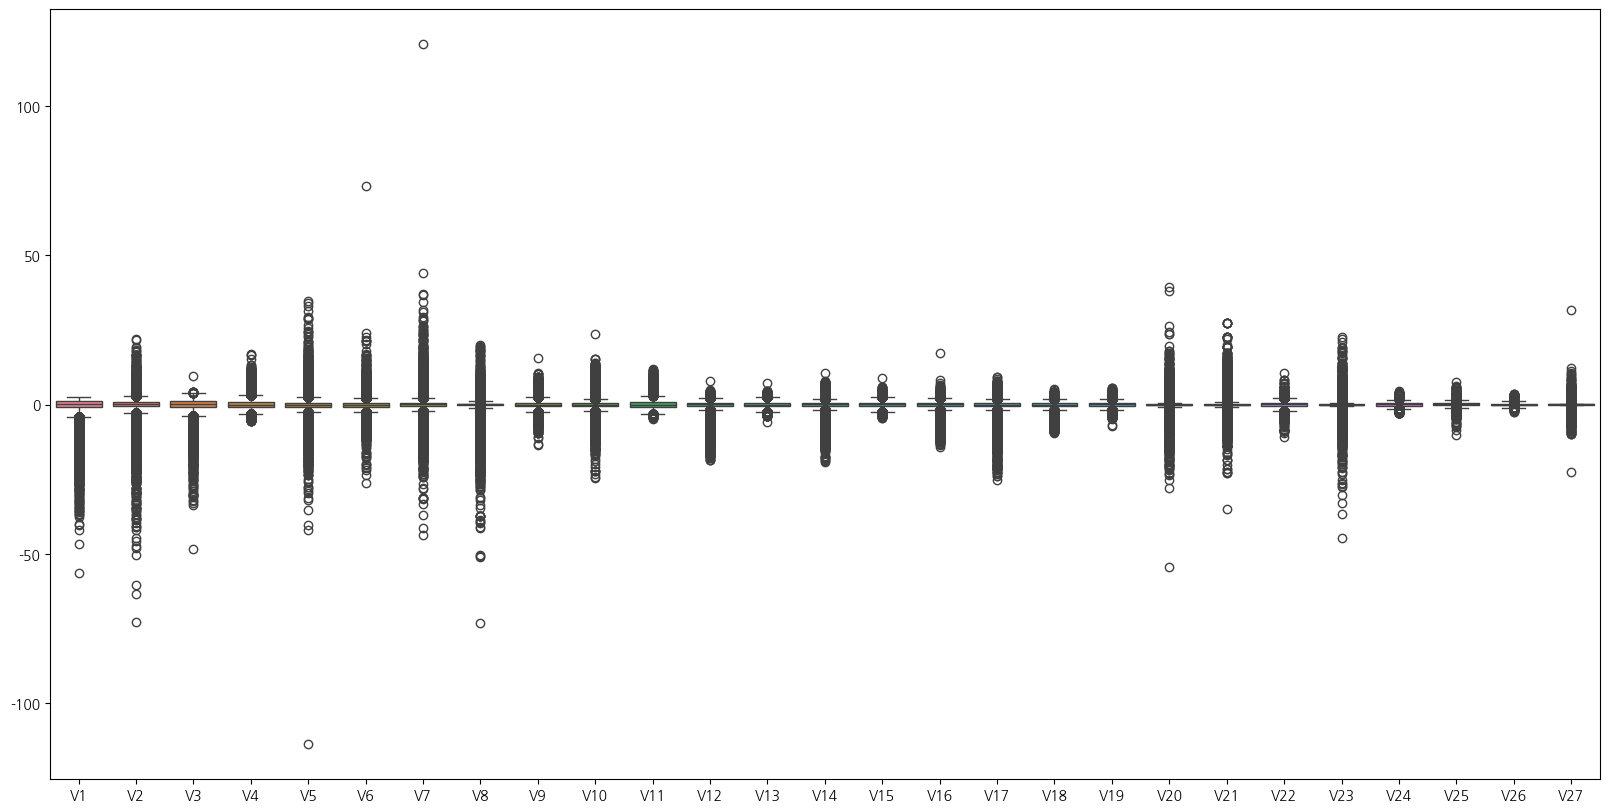

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(X.iloc[:,1:-2])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [19]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.488962,-0.361371,1.178226,0.278093,1.498313,1.419875,0.141661,1.577349,-0.203011,-2.210712,...,-0.255644,0.490638,0.213094,-2.034310,-0.608355,1.728462,0.573111,-0.509689,0.063527,0.010488
1,-0.262744,-0.430146,0.979794,0.267543,-0.073714,-0.093640,-0.232824,0.153593,1.006613,-0.379652,...,0.509885,-0.483922,-0.672946,0.111835,-0.139542,-0.149721,0.241756,1.378268,0.504358,-0.182072
2,-0.318003,-4.201969,2.204142,-2.697191,1.214578,-3.415321,6.150659,-10.926836,-58.733463,-3.778259,...,13.360191,-38.815298,4.478592,-1.256072,0.400278,-2.952654,-0.612071,12.404057,-8.680046,9.200392
3,0.735523,0.627441,-0.741610,-1.098979,0.471785,-0.227835,-0.745755,0.365099,-0.582421,0.955446,...,1.249630,-0.089864,-0.618099,-0.173818,-0.228173,-0.355976,-0.109699,-0.425699,0.137661,4.087121
4,0.871214,0.877230,-0.325867,-1.438239,-0.459349,0.304315,-1.360623,0.790662,-1.124593,0.222408,...,-0.104049,0.923944,0.918181,-0.761247,0.196342,0.771773,1.924975,-1.083041,-0.828827,0.908964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170879,0.520716,0.923605,-0.526086,-0.579549,-0.109313,-0.818672,-1.346803,-0.223054,-0.876070,-0.444209,...,-1.652413,-0.135903,0.231545,0.762721,1.140683,-0.327210,1.379921,-0.454369,-0.493540,0.111872
170880,-0.048725,0.560365,0.343691,-0.145537,0.705942,0.117450,-0.771911,0.499367,-0.780596,-0.268427,...,-0.122455,0.100806,0.109011,-0.470880,0.483735,1.290789,-0.434199,-0.032636,0.012904,-0.254510
170881,-0.414382,-0.365973,0.768634,0.635255,0.200836,0.088700,0.229259,0.275070,0.314250,-0.351530,...,0.992044,-0.255577,-0.235647,0.164380,-0.043260,-0.948308,0.425869,2.188480,1.858444,-0.204027
170882,0.651824,0.937431,-0.003182,-1.233075,-0.064531,0.508036,-0.910894,0.568747,-0.852517,0.060661,...,-0.548198,0.487760,0.556636,-0.251151,-0.414651,0.636901,0.519201,-0.581286,-0.797227,-0.283876


In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [21]:
xgb = XGBClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=10)
xgb.fit(X_train, y_train)
valid_pred = xgb.predict(X_valid)
print(classification_report(y_valid, valid_pred))
print(roc_auc_score(y_valid, valid_pred))
print(roc_curve(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

0.8876495852724432
(array([0.00000000e+00, 2.11033537e-04, 1.00000000e+00]), array([0.       , 0.7755102, 1.       ]), array([inf,  1.,  0.]))


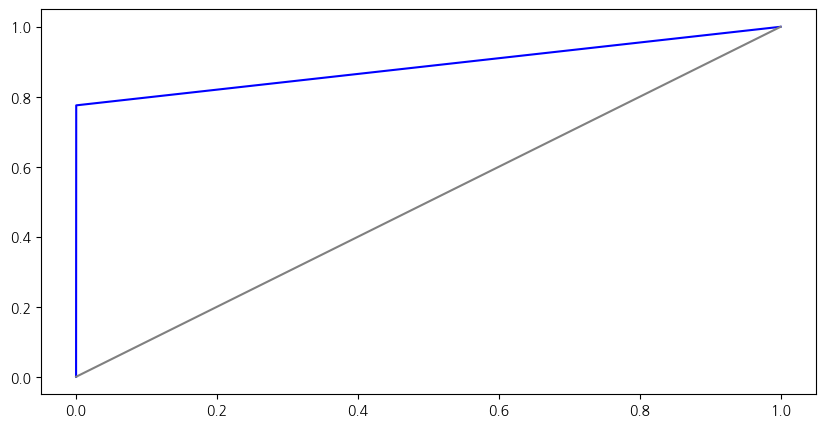

In [22]:
fpr, tpr, _ = roc_curve(y_valid, valid_pred)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='gray')
plt.show()

In [23]:
test_pred = xgb.predict(X_test)
print(classification_report(y_test, test_pred))
print(roc_auc_score(y_test, test_pred))
print(roc_curve(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.83      0.85        99

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

0.9140446904370721
(array([0.00000000e+00, 1.93447409e-04, 1.00000000e+00]), array([0.        , 0.82828283, 1.        ]), array([inf,  1.,  0.]))


일반화 성능을 올리기위해서 stratified-kfold와 gridsearch로 하이퍼파라미터 탐색

In [24]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [25]:
skf  = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

In [26]:
params = dict(max_depth=[3,5,7,9], n_estimators=[100, 300, 500, 1000], subsample=[0.6, 0.8, 1.0],
             n_jobs=[-1], random_state=[10])

In [27]:
grid_cv = GridSearchCV(XGBClassifier(), param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('best parameters: ', grid_cv.best_params_)
best_model = grid_cv.best_estimator_


best parameters:  {'max_depth': 5, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 10, 'subsample': 0.6}


In [28]:
best_pred = best_model.predict(X_test)
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.83      0.84        99

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
print(roc_auc_score(y_test, best_pred))

0.9140095181809478


# 데이터 증폭 및 여러 개의 모델을 pipeline으로 연결해 성능 비교 분석

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

파이프라인을 위한 모델 설정

In [78]:
models = { 'XGB' : XGBClassifier(n_jobs=-1, random_state=10),
           'RFC' : RandomForestClassifier(n_jobs=-1, random_state=10),
           'LGBM' : LGBMClassifier(n_jobs=-1, random_state=10)
         }
models

{'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, random_state=10, ...),
 'RFC': RandomForestClassifier(n_jobs=-1, random_state=10),
 'LGBM': LGBMClassifier(n_jobs=-1, random_state=10)}

각 모델의 하이퍼파라미터 설정

In [79]:
params = {
    'XGB': {
        'smote__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1.0],
        'xgbclassifier__max_depth': [3, 5, 7, 9],
        'xgbclassifier__n_estimators': [100, 300, 500],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0]
    },
    'RFC': {
        'smote__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1.0],
        'randomforestclassifier__max_depth': [3, 5, 7, 9],
        'randomforestclassifier__n_estimators': [100, 300, 500]
    },
    'LGBM': {
        'smote__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1.0],
        'lgbmclassifier__max_depth': [3, 5, 7, 9],
        'lgbmclassifier__n_estimators': [100, 300, 500],
        'lgbmclassifier__subsample': [0.6, 0.8, 1.0]
    }
}

In [80]:
# 각 모델별로 최적의 파라미터 찾고 성능 평가
best_estimators = {}
roc_auc_scores = {}
classification_reports = {}

In [82]:
for model_name, model in models.items():
    print(model_name, model)
    # SMOTE + 파이프라인
    pipeline = imb_make_pipeline(SMOTE(random_state=10), model)
    
    # GridSearch 설정
    grid_cv = GridSearchCV(pipeline, param_grid=params[model_name], cv=skf,
                           scoring='roc_auc', return_train_score=True,
                           n_jobs=-1, verbose=2
                          )
    grid_cv.fit(X_train, y_train)
    # 최적 모델 저장
    best_estimators[model_name] = grid_cv.best_estimator_
    print(f'{model_name}_best params', grid_cv.best_params_)
    
    # 테스트 데이터 평가
    y_test_pred = grid_cv.best_estimator_.predict(X_test)
    y_test_pred_proba = grid_cv.best_estimator_.predict_proba(X_test)[:,1]
    
    # roc_auc 점수 계산
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    roc_auc_scores[model_name] = roc_auc
    
    # classification_report 생성
    report = classification_report(y_test, y_test_pred, output_dict=True)
    classification_reports[model_name] = report
    
    print(f"\n{model_name} - ROC AUC: {roc_auc:.4f}")
    print(f"classification_report{model_name}:\n", classification_reports[model_name])
    
    

XGB XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=10, ...)
Fitting 5 folds for each of 180 candidates, totalling 900 fits


ValueError: Invalid parameter 'model' for estimator Pipeline(steps=[('smote', SMOTE(random_state=10)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=10, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].